In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read CSV edge list
df = pd.read_csv("/Users/simonbruun-simonsen/Desktop/network-project/european_power_grid_network/datasets/Anonymized.csv")   # replace with your filename

# Build graph
G = nx.from_pandas_edgelist(df, source="from", target="to", create_using=nx.DiGraph())

print(G.number_of_nodes(), "nodes")
print(G.number_of_edges(), "edges")

6659 nodes
8309 edges


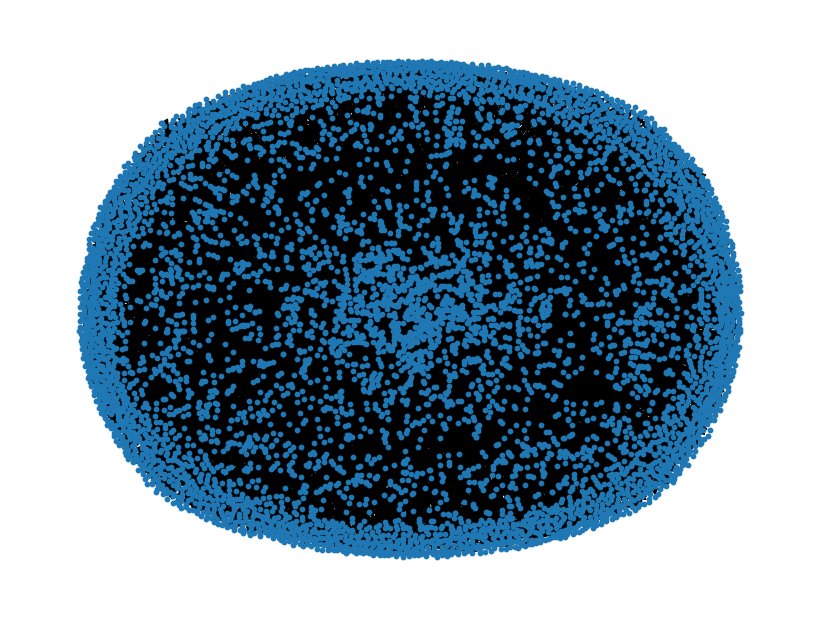

In [2]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout algorithm
nx.draw(G, pos, with_labels=False, node_size=10, font_size=10, arrows=True)
plt.show()

In [24]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())


deg_df = pd.DataFrame({
    "node": list(G.nodes()),
    "in_degree": [in_degrees.get(n, 0) for n in G.nodes()],
    "out_degree": [out_degrees.get(n, 0) for n in G.nodes()]
})

# Optional: show top 10 nodes with highest in-degree and out-degree
print("\nTop 10 nodes by in-degree:")
print(deg_df.sort_values("in_degree", ascending=False).head(10))

print("\nTop 10 nodes by out-degree:")
print(deg_df.sort_values("out_degree", ascending=False).head(10))
np.average(deg_df["in_degree"]), np.average(deg_df["out_degree"])


Top 10 nodes by in-degree:
      node  in_degree  out_degree
1951  3971         11           2
117   2533          9           3
3215  3887          9           0
5398  3604          8           0
1448  3615          8           0
558    219          8           5
1686  3262          8           1
8     3531          8           0
48    4070          8           0
597   3076          8           1

Top 10 nodes by out-degree:
      node  in_degree  out_degree
2497  3088          1          15
36    1742          3          13
950    386          0          12
2938  1251          1          11
1876   735          2          11
4962  3208          4          11
933    384          0          11
894    376          0          10
3952  1658          2          10
1985   769          0          10


(np.float64(1.2477849526956), np.float64(1.2477849526956))

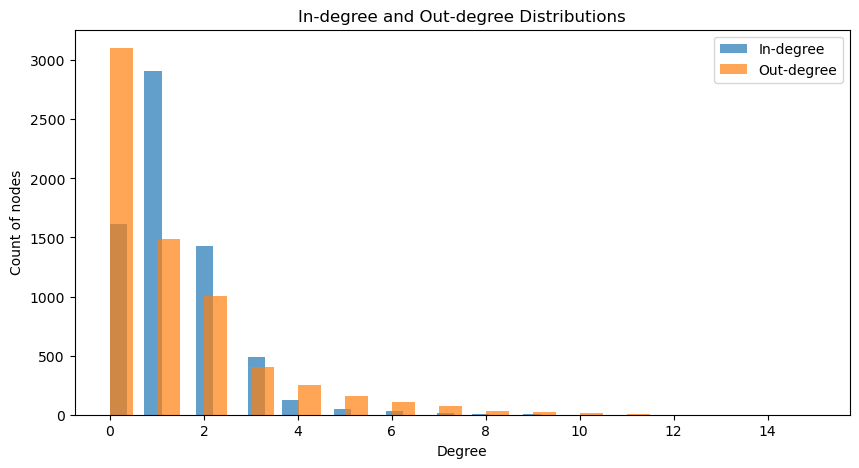

In [4]:
plt.figure(figsize=(10,5))
plt.hist(deg_df["in_degree"], bins=30, alpha=0.7, label="In-degree")
plt.hist(deg_df["out_degree"], bins=30, alpha=0.7, label="Out-degree")
plt.xlabel("Degree")
plt.ylabel("Count of nodes")
plt.title("In-degree and Out-degree Distributions")
plt.legend()
plt.show()

# Save to CSV if you want to keep the results
deg_df.to_csv("node_degrees.csv", index=False)

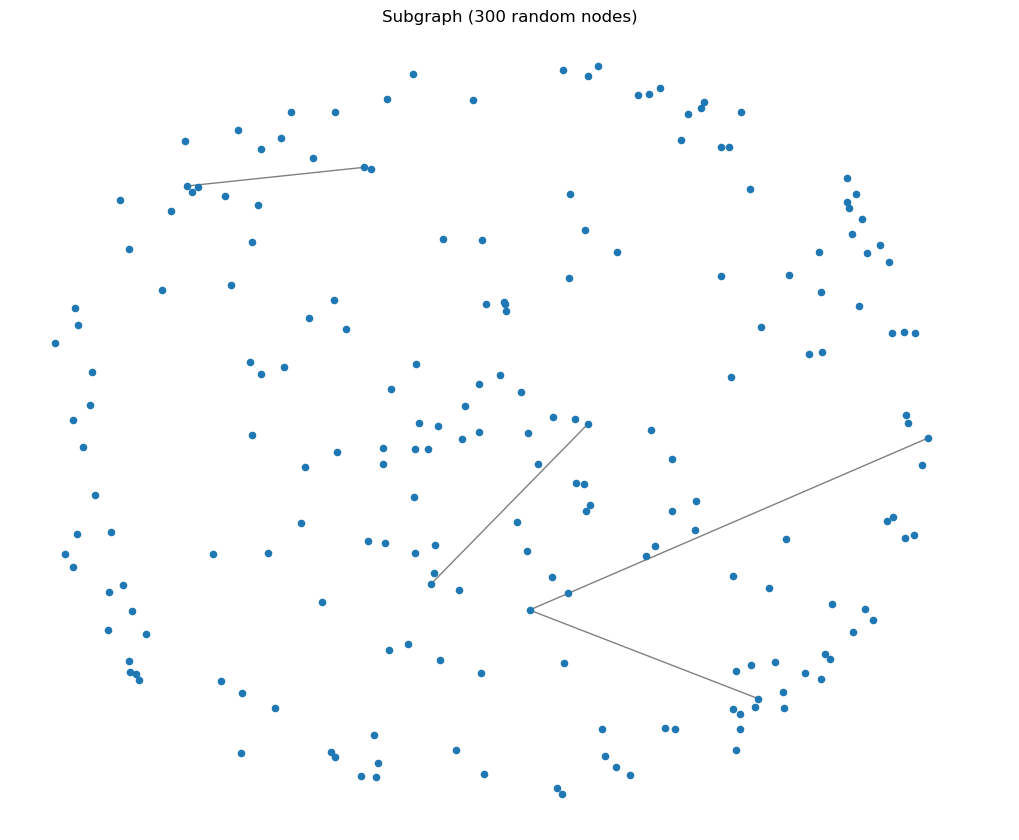

In [5]:
# Pick 300 random nodes
import random
sub_nodes = random.sample(list(G.nodes()), 200)
H = G.subgraph(sub_nodes)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.1, iterations=50, seed=42)
nx.draw(H,pos, node_size=20, arrows=False, edge_color="gray")
plt.title("Subgraph (300 random nodes)")
plt.show()  

In [6]:
edges = pd.read_csv("/Users/simonbruun-simonsen/Desktop/network-project/european_power_grid_network/datasets/Anonymized.csv")
nodes = pd.read_csv("/Users/simonbruun-simonsen/Desktop/network-project/european_power_grid_network/datasets/Price_anonymized.csv")


In [7]:
G = nx.from_pandas_edgelist(edges, source="from", target="to", create_using=nx.DiGraph())
# Add attributes to graph nodes
node_attr = nodes.set_index("name").to_dict(orient="index")
nx.set_node_attributes(G, node_attr)


In [8]:
degrees = pd.DataFrame({
    "name": list(G.nodes()),
    "in_degree": [G.in_degree(n) for n in G.nodes()],
    "out_degree": [G.out_degree(n) for n in G.nodes()],
})
merged = degrees.merge(nodes, on="name")
merged

,name,in_degree,out_degree,price,country
0,1,0,3,70.039927,BE
1,1782,1,1,69.984008,BE
2,2852,4,5,70.138422,FR
3,5089,1,0,70.039927,BE
4,2,0,4,65.827296,CH
...,...,...,...,...,...
6654,4053,1,1,67.045737,NL
6655,6645,1,0,70.507165,BE
6656,6650,1,0,55.710971,IT
6657,6653,1,0,53.485262,IT


In [9]:
merged["country"].value_counts()


merged.loc[merged["country"] == "DE"]

,name,in_degree,out_degree,price,country
29,9,0,4,66.111758,DE
30,1976,2,2,65.954059,DE
31,1977,2,2,66.052944,DE
33,5243,2,0,66.219523,DE
34,10,0,10,66.327287,DE
...,...,...,...,...,...
6620,6621,1,0,66.197487,DE
6622,6629,1,0,66.446491,DE
6623,3987,1,1,66.486786,DE
6636,4015,0,1,69.251942,DE


In [10]:
import numpy as np
in_deg = np.array([G.in_degree(n) for n in G.nodes()])
out_deg = np.array([G.out_degree(n) for n in G.nodes()])


def compute_ccdf(degrees):

    values = np.sort(np.unique(degrees))

    ccdf = [np.sum(degrees >= v)/len(degrees) for v in values]
    return values, ccdf

in_values, in_ccdf = compute_ccdf(in_deg)
out_values, out_ccdf = compute_ccdf(out_deg)

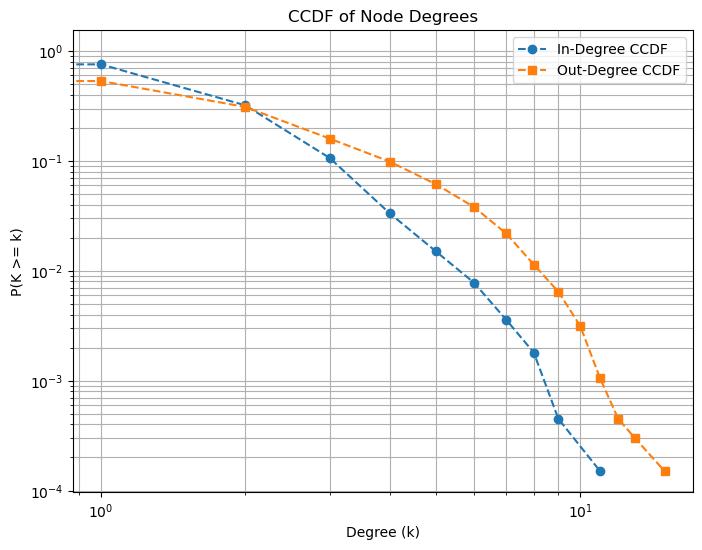

In [11]:
plt.figure(figsize=(8,6))
plt.loglog(in_values, in_ccdf, marker='o', linestyle='--', label='In-Degree CCDF')
plt.loglog(out_values, out_ccdf, marker='s', linestyle='--', label='Out-Degree CCDF')
plt.xlabel("Degree (k)")
plt.ylabel("P(K >= k)")
plt.title("CCDF of Node Degrees")
plt.legend()
plt.grid(True, which="both")
plt.show()

In [12]:
G.nodes()

NodeView((1, 1782, 2852, 5089, 2, 325, 338, 342, 3531, 3, 761, 2885, 4, 3051, 5, 782, 1784, 4065, 4599, 5100, 6, 15, 330, 2910, 7, 3460, 4066, 8, 4067, 9, 1976, 1977, 4068, 5243, 10, 1613, 1742, 2392, 3078, 3682, 5182, 5183, 5184, 5242, 11, 462, 3783, 4069, 4070, 12, 1202, 3021, 13, 2315, 14, 721, 803, 2331, 5578, 332, 340, 344, 16, 22, 157, 175, 227, 1260, 4209, 17, 634, 2578, 18, 19, 326, 819, 3414, 20, 4071, 21, 170, 199, 229, 3871, 23, 2611, 3911, 24, 25, 184, 238, 2175, 26, 831, 3275, 3398, 6478, 6479, 6480, 6481, 27, 4072, 28, 534, 561, 1879, 4073, 29, 38, 3946, 30, 555, 592, 2456, 2517, 2683, 31, 2533, 2571, 4074, 5704, 5705, 32, 369, 2430, 2655, 4075, 33, 57, 2428, 4076, 4442, 34, 556, 2454, 2663, 5682, 5762, 6606, 6607, 35, 1278, 4077, 36, 288, 2444, 2504, 37, 4236, 4452, 224, 4078, 39, 80, 486, 4168, 4226, 4227, 40, 62, 149, 243, 264, 272, 493, 4107, 4194, 4223, 41, 514, 4097, 4098, 42, 253, 279, 523, 4234, 43, 266, 284, 4079, 44, 47, 48, 55, 78, 1868, 3407, 45, 51, 67, 70, 8

   country  in_degree  out_degree
0       AD          0           1
1       AT        172         167
2       BE        144         154
3       CH        233         244
4       CZ         79          81
5       DE       2304        2309
6       DK          6           5
7       ES       1328        1335
8       FR       2186        2166
9       IT        965         970
10      LU         29          23
11      MT          1           0
12      NL        351         351
13      PL        288         287
14      PT        223         216


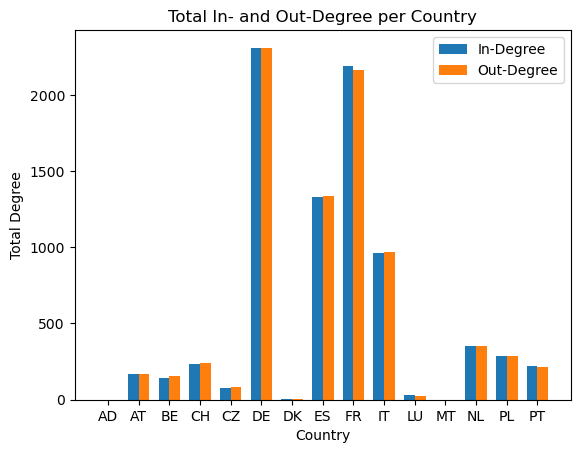

In [13]:
country_degrees = merged.groupby("country")[["in_degree", "out_degree"]].sum().reset_index()

print(country_degrees)
x = np.arange(len(country_degrees))
width = 0.35

plt.bar(x - width/2, country_degrees["in_degree"], width, label="In-Degree")
plt.bar(x + width/2, country_degrees["out_degree"], width, label="Out-Degree")

plt.xticks(x, country_degrees["country"])
plt.xlabel("Country")
plt.ylabel("Total Degree")
plt.title("Total In- and Out-Degree per Country")
plt.legend()
plt.show()

In [14]:
country_degrees

,country,in_degree,out_degree
0,AD,0,1
1,AT,172,167
2,BE,144,154
3,CH,233,244
4,CZ,79,81
5,DE,2304,2309
6,DK,6,5
7,ES,1328,1335
8,FR,2186,2166
9,IT,965,970


In [15]:
node_to_country = merged.set_index("name")["country"].to_dict()

In [16]:
df_country = df.copy()
df_country["from_country"] = df_country["from"].map(node_to_country)
df_country["to_country"] = df_country["to"].map(node_to_country)

In [17]:
df_country

,from,to,from_country,to_country
0,1,1782,BE,BE
1,1,2852,BE,FR
2,1,5089,BE,BE
3,2,325,CH,CH
4,2,338,CH,CH
...,...,...,...,...
8304,4057,6144,FR,FR
8305,4058,6650,IT,IT
8306,4059,5824,IT,AT
8307,4061,6653,IT,IT


In [18]:
edges_country = df_country.groupby(["from_country", "to_country"]).size().reset_index(name="weight")
edges_country = edges_country[edges_country["from_country"] != edges_country["to_country"]]

edges_country["weight"].sum()

np.int64(145)

In [19]:
edges_country

,from_country,to_country,weight
0,AD,FR,1
2,AT,CH,2
3,AT,CZ,1
4,AT,DE,7
5,AT,IT,2
6,AT,PL,1
8,BE,FR,6
9,BE,LU,2
10,BE,NL,4
11,CH,AT,4
